In [3]:
# import warnings
# warnings.filterwarnings('ignore')
import gym
import json
import datetime as dt
# from stable_baselines3.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C,PPO1, PPO2
from stable_baselines.common.policies import MlpLstmPolicy, MlpPolicy, MlpLnLstmPolicy
from stable_baselines.common.env_checker import check_env
from Stock_market_env import CustomDiscreteEnv, CustomContinuousEnv, StockTradingEnv
import pandas as pd
import yfinance as yf
import os
import gym_anytrading
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
data = pd.DataFrame(yf.download(tickers='HDFCBANK.NS', period='3y', interval='1d'))
data = data.drop(['Adj Close'], axis = 1)
data = data.reset_index(drop = True)
data = data.dropna()

[*********************100%***********************]  1 of 1 completed


In [17]:
train= True
load = False
learn_timesteps = 10000
dir = 'D:\Reinforcement Learning\My codes\Custom gym\models\Stable Baselines/' 

In [18]:
env_name = 'StockTradingEnv'

if(env_name=='CustomDiscreteEnv'):
    env = DummyVecEnv([lambda: CustomDiscreteEnv(data)])
elif(env_name=='CustomContinuousEnv'):
    env = DummyVecEnv([lambda: CustomContinuousEnv(data)])
elif(env_name=='Gym_anytrading'):
    window_size =5
    env = lambda: gym.make('stocks-v0', df=data, frame_bound=(window_size,len(data.loc[:,'Volume'].values)-window_size), window_size=window_size)
    env = DummyVecEnv([env])
elif(env_name=='StockTradingEnv'):
    env = DummyVecEnv([lambda: StockTradingEnv(data)])
    

In [19]:
if not load and train:
    model =PPO2(MlpPolicy, env, nminibatches=1, verbose=1)
    model.learn(total_timesteps=learn_timesteps)
    model.save(dir+env_name)
if load and train:
    model = PPO2.load(dir+env_name)
    model.learn(total_timesteps = learn_timesteps)
    model.save(dir+env_name)
if load and not train:
    model =PPO2.load(dir+env_name)
    

--------------------------------------
| approxkl           | 1.7166781e-06 |
| clipfrac           | 0.0           |
| explained_variance | 2.32e-05      |
| fps                | 210           |
| n_updates          | 1             |
| policy_entropy     | 2.8378797     |
| policy_loss        | -0.0003115707 |
| serial_timesteps   | 128           |
| time_elapsed       | 0             |
| total_timesteps    | 128           |
| value_loss         | 119040.375    |
--------------------------------------
---------------------------------------
| approxkl           | 1.4625596e-06  |
| clipfrac           | 0.0            |
| explained_variance | -6.44e-06      |
| fps                | 491            |
| n_updates          | 2              |
| policy_entropy     | 2.837903       |
| policy_loss        | -2.6001362e-06 |
| serial_timesteps   | 256            |
| time_elapsed       | 0.61           |
| total_timesteps    | 256            |
| value_loss         | 297652.6       |
-------------

info {'total_reward': 222.5501708984375, 'total_profit': 0.6438162375668928, 'position': 1}


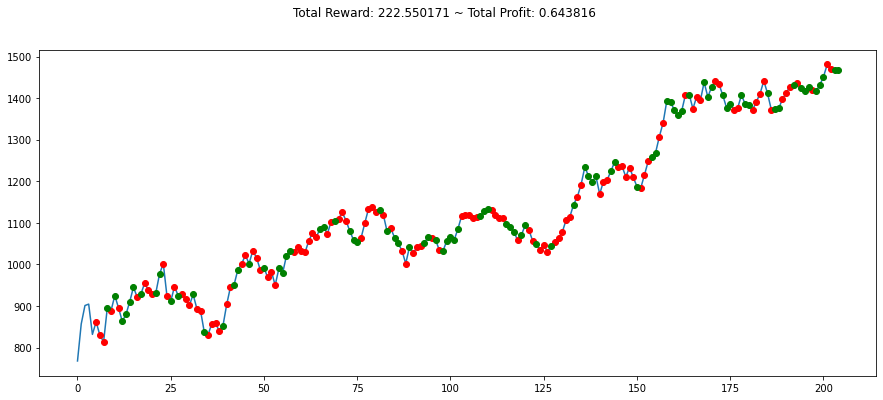

In [23]:
if(env_name=='Gym_anytrading'):
    env = gym.make('stocks-v0', df=data, frame_bound=(200,400), window_size=5)
    obs = env.reset()
    while True: 
        obs = obs[np.newaxis, ...]
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        if done:
            print("info", info)
            break
        
    plt.figure(figsize=(15,6))
    plt.cla()
    env.render_all()
    plt.show()

In [15]:
env = StockTradingEnv(data)
obs = env.reset()
done = False
steps = 0
while not done:
  action, _states = model.predict(obs)
  
  obs, rewards, done, info = env.step(action)
  env.render()
  steps+=1

plt.figure(figsize=(15,10))
plt.cla()
env.render_all()
plt.show()

ValueError: Error: The environment must be vectorized when using recurrent policies.

In [8]:
lst =[]
for i, _ in enumerate(env._position_history):
    if (env._position_history[i]!=0):
         lst.append(1)
len(env.long_ticks), len(env.short_ticks), len(env.hold_ticks), len(lst), len(env.squared_off_ticks), env.action_cntr

(9, 6, 26, 41, 27, 30)

In [12]:
lst =[]
for i, _ in enumerate(env._trade_completion_history):
    if (env._trade_completion_history[i]==1):
         lst.append(1)
         
len(lst)

27